In [1]:
import os
import itertools

import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.applications import EfficientNetB3
from keras.applications import VGG16

# ignore the warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
def loading_the_data(data_dir):
    filepaths = []
    labels = []

    folds = os.listdir(data_dir)

    for fold in folds:
        foldpath = os.path.join(data_dir, fold)
        filelist = os.listdir(foldpath)
        for file in filelist:
            fpath = os.path.join(foldpath, file)

            filepaths.append(fpath)
            labels.append(fold)

    Fseries = pd.Series(filepaths, name='filepaths')
    Lseries = pd.Series(labels, name='labels')

    df = pd.concat([Fseries, Lseries], axis=1)

    return df

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [9]:
data_dir = '/content/drive/MyDrive/tomato/train'
df = loading_the_data(data_dir)

df

,filepaths,labels
0,/content/drive/MyDrive/tomato/train/Tomato___T...,Tomato___Tomato_Yellow_Leaf_Curl_Virus
1,/content/drive/MyDrive/tomato/train/Tomato___T...,Tomato___Tomato_Yellow_Leaf_Curl_Virus
2,/content/drive/MyDrive/tomato/train/Tomato___T...,Tomato___Tomato_Yellow_Leaf_Curl_Virus
3,/content/drive/MyDrive/tomato/train/Tomato___T...,Tomato___Tomato_Yellow_Leaf_Curl_Virus
4,/content/drive/MyDrive/tomato/train/Tomato___T...,Tomato___Tomato_Yellow_Leaf_Curl_Virus
...,...,...
10071,/content/drive/MyDrive/tomato/train/Tomato___L...,Tomato___Late_blight
10072,/content/drive/MyDrive/tomato/train/Tomato___L...,Tomato___Late_blight
10073,/content/drive/MyDrive/tomato/train/Tomato___L...,Tomato___Late_blight
10074,/content/drive/MyDrive/tomato/train/Tomato___L...,Tomato___Late_blight


In [5]:
data_balance = df.labels.value_counts()
data_balance

,count
labels,
Tomato___Target_Spot,1030
Tomato___Tomato_mosaic_virus,1026
Tomato___Spider_mites Two-spotted_spider_mite,1020
Tomato___Tomato_Yellow_Leaf_Curl_Virus,1000
Tomato___healthy,1000
Tomato___Leaf_Mold,1000
Tomato___Bacterial_spot,1000
Tomato___Septoria_leaf_spot,1000
Tomato___Early_blight,1000


In [6]:
def custom_autopct(pct):
    total = sum(data_balance)
    val = int(round(pct*total/100.0))
    return "{:.1f}%\n({:d})".format(pct, val)


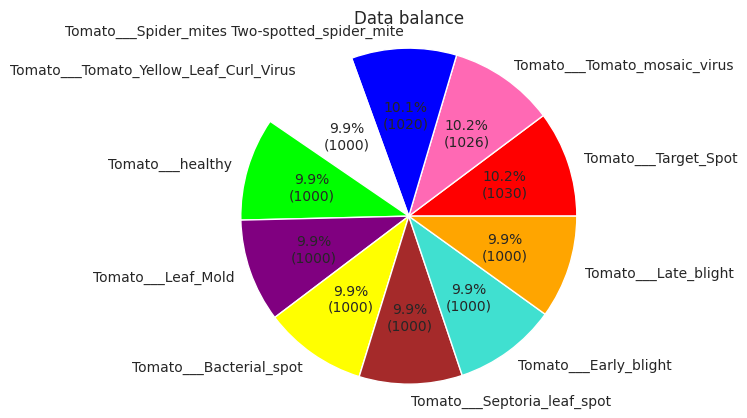

In [7]:
plt.pie(data_balance, labels = data_balance.index, autopct=custom_autopct, colors = ["#FF0000", "#FF69B4", "#0000FF", "#FFFFFF", "#00FF00", "#800080", "#FFFF00", "#A52A2A", "#40E0D0", "#FFA500"])
plt.title("Data balance")
plt.axis("equal")
plt.show()

In [10]:
def model_performance(history, Epochs):
    tr_acc = history.history['accuracy']
    tr_loss = history.history['loss']
    val_acc = history.history['val_accuracy']
    val_loss = history.history['val_loss']

    Epochs = [i+1 for i in range(len(tr_acc))]

    plt.figure(figsize= (20, 8))
    plt.style.use('fivethirtyeight')

    plt.subplot(1, 2, 1)
    plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
    plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
    plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout
    plt.show()